#### Kmeans Algorithm

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as SklearnKMeans
import time

In [3]:
def compute_labels(X, centroids):
    
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    
    return labels

In [4]:
def compute_inertia_centroids(X, labels):
    
    n_clusters = np.unique(labels).size  
    centroids = np.zeros((n_clusters, X.shape[1])) 
    inertia = 0.0

    for k in range(n_clusters):
        cluster_points = X[labels == k]  
        if len(cluster_points) > 0:
            centroid = cluster_points.mean(axis=0)  
            centroids[k] = centroid
            distances = np.linalg.norm(cluster_points - centroid, axis=1)
            inertia += np.sum(distances**2) 

    return inertia, centroids

In [5]:
def kmeans(X, n_clusters, max_iter=100, tol=1e-7, random_state=42):
    
    np.random.seed(random_state)
    random_indices = np.random.choice(X.shape[0], n_clusters, replace=False) 
    centroids = X[random_indices]  

    inertia_history = []  

    for iteration in range(max_iter):
        labels = compute_labels(X, centroids)
        inertia, new_centroids = compute_inertia_centroids(X, labels)
        inertia_history.append(inertia)

        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        
        centroids = new_centroids 

    return centroids, labels, inertia, inertia_history

Final Centroids:
[[-1.59841963  2.98715524]
 [ 0.95346087  4.30374539]
 [ 2.13480346  0.81914762]]
Inertia: 1685.7644138358623
Elapsed Time: 0.0117 seconds


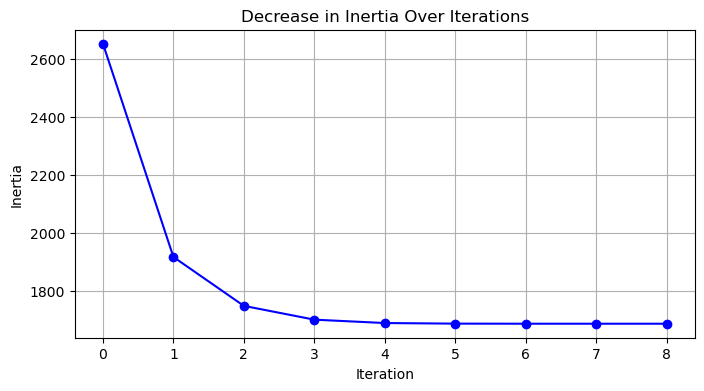

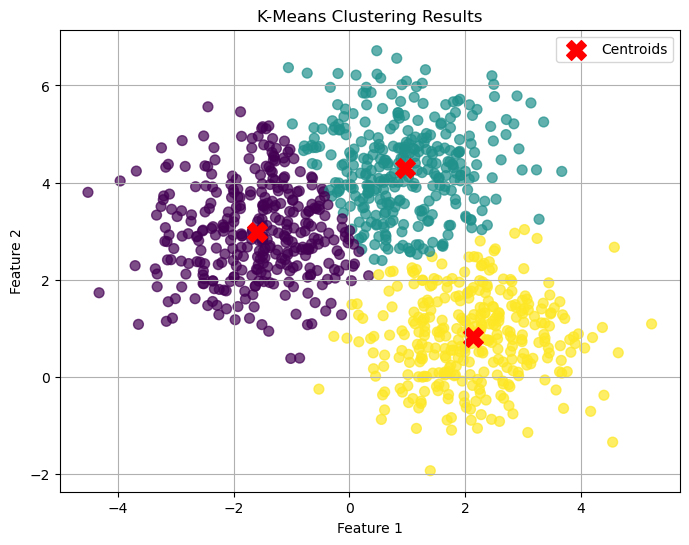

In [6]:
if __name__ == '__main__':
    random_state = 0
    n_samples = 1000
    n_clusters = 3

    # Generate data
    X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=n_clusters)

    # Apply K-means to X
    start_time = time.time()
    centroids, labels, inertia, inertia_history = kmeans(X, n_clusters, random_state=random_state)
    elapsed_time = time.time() - start_time

    # Print results
    print(f"Final Centroids:\n{centroids}")
    print(f"Inertia: {inertia}")
    print(f"Elapsed Time: {elapsed_time:.4f} seconds")

    # Plotting inertia over iterations
    plt.figure(figsize=(8, 4))
    plt.plot(inertia_history, marker='o', linestyle='-', color='blue')
    plt.title('Decrease in Inertia Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Inertia')
    plt.grid()
    plt.show()

    # Visualize clustering results
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', marker='o', alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
    plt.title('K-Means Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()



Random State: 0
Final Centroids:
[[-7.58622288 -6.98552322]
 [-6.45460925 -5.83139828]
 [ 3.28819326  3.1345176 ]
 [-5.70414657  8.22782609]
 [-5.99740009 -7.76409197]]
Inertia: 7166.681449056072
Elapsed Time: 0.0057 seconds


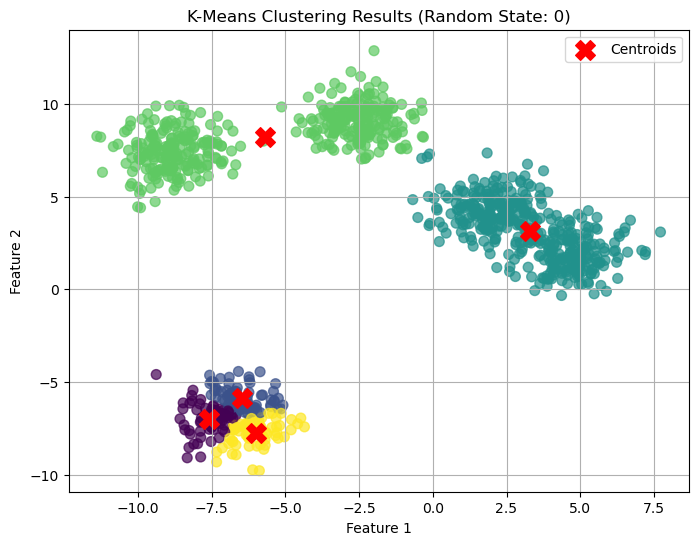


Random State: 1
Final Centroids:
[[ 2.01603476  4.27139248]
 [-2.50265159  9.03963769]
 [ 4.65960568  1.89528052]
 [-8.80798056  7.40425704]
 [-6.68630691 -6.81139455]]
Inertia: 1873.2530113628284
Elapsed Time: 0.0234 seconds


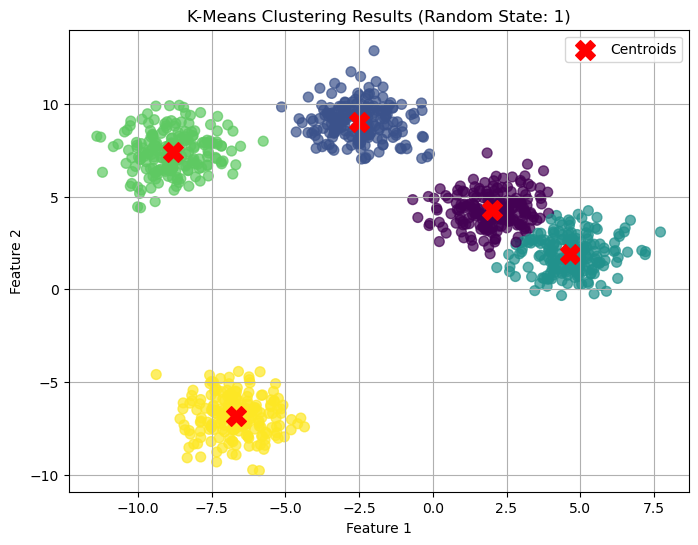


Random State: 2
Final Centroids:
[[ 2.01603476  4.27139248]
 [ 4.65960568  1.89528052]
 [-6.68630691 -6.81139455]
 [-8.80798056  7.40425704]
 [-2.50265159  9.03963769]]
Inertia: 1873.2530113628281
Elapsed Time: 0.0127 seconds


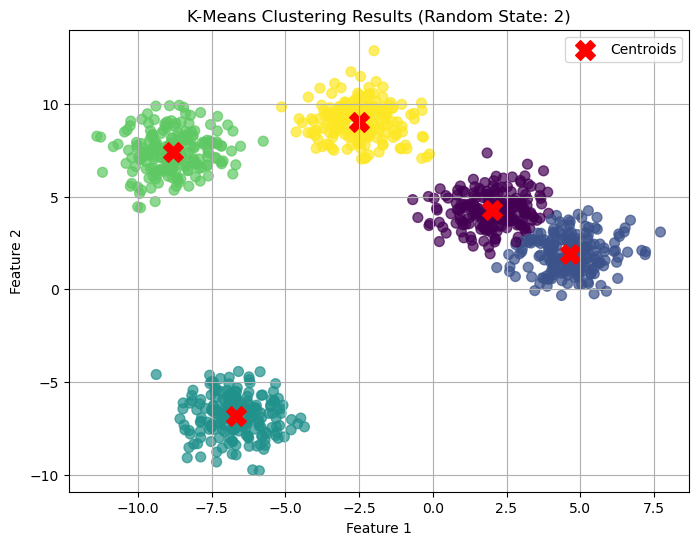


Random State: 3
Final Centroids:
[[ 2.01603476  4.27139248]
 [-2.50265159  9.03963769]
 [-6.68630691 -6.81139455]
 [ 4.65960568  1.89528052]
 [-8.80798056  7.40425704]]
Inertia: 1873.2530113628286
Elapsed Time: 0.0170 seconds


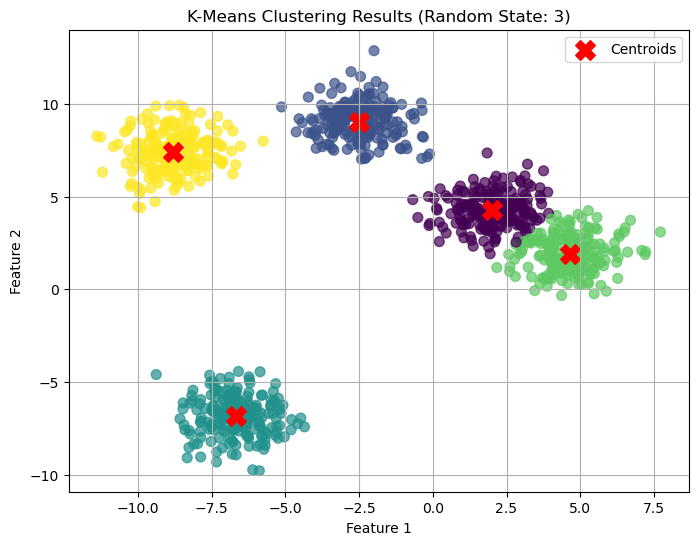


Random State: 4
Final Centroids:
[[-6.68630691 -6.81139455]
 [-2.50265159  9.03963769]
 [ 2.01603476  4.27139248]
 [ 4.65960568  1.89528052]
 [-8.80798056  7.40425704]]
Inertia: 1873.2530113628286
Elapsed Time: 0.0000 seconds


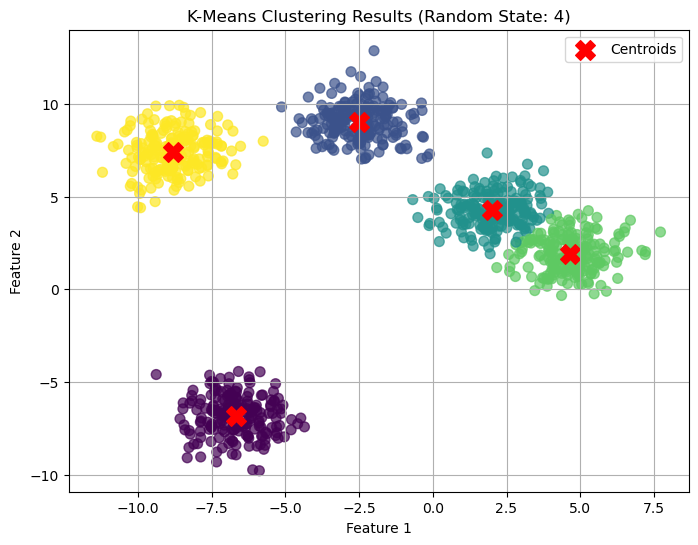

In [7]:
if __name__ == '__main__':
    
    n_samples = 1000
    n_clusters = 5  
    random_states = [0, 1, 2, 3, 4] 

    X, y = make_blobs(n_samples=n_samples, random_state=42, centers=n_clusters)

    for random_state in random_states:
        start_time = time.time()
        centroids, labels, inertia, inertia_history = kmeans(X, n_clusters, random_state=random_state)
        elapsed_time = time.time() - start_time

        print(f"\nRandom State: {random_state}")
        print(f"Final Centroids:\n{centroids}")
        print(f"Inertia: {inertia}")
        print(f"Elapsed Time: {elapsed_time:.4f} seconds")

        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', marker='o', alpha=0.7)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
        plt.title(f'K-Means Clustering Results (Random State: {random_state})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.grid()
        plt.show()



Your Implementation:
Final Centroids:
[[-8.80798056  7.40425704]
 [ 4.65960568  1.89528052]
 [ 2.01603476  4.27139248]
 [-6.68630691 -6.81139455]
 [-2.50265159  9.03963769]]
Inertia: 1873.2530113628286
Elapsed Time: 0.0030 seconds

Scikit-Learn Implementation:
Final Centroids:
[[-6.68630691 -6.81139455]
 [ 2.03639615  4.26762858]
 [-2.50265159  9.03963769]
 [-8.80798056  7.40425704]
 [ 4.66534309  1.87476184]]
Inertia: 1873.4290193066267
Elapsed Time: 0.5630 seconds


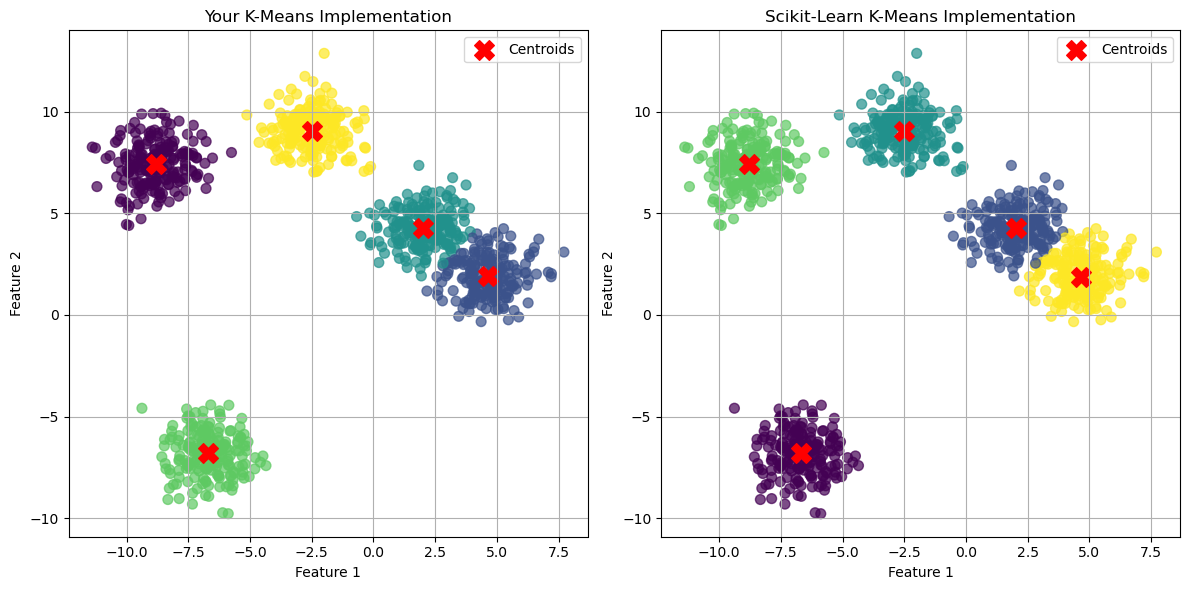

In [8]:
if __name__ == '__main__':
    n_samples = 1000
    n_clusters = 5
    random_state = 42

    # Data
    X, y = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=random_state)

    #K-Means implementation
    start_time = time.time()
    centroids, labels, inertia, inertia_history = kmeans(X, n_clusters, random_state=random_state)
    elapsed_time_your_impl = time.time() - start_time

    print("\nYour Implementation:")
    print(f"Final Centroids:\n{centroids}")
    print(f"Inertia: {inertia}")
    print(f"Elapsed Time: {elapsed_time_your_impl:.4f} seconds")
    
    #scikit-learn's K-Means implementation
    start_time = time.time()
    sklearn_kmeans = SklearnKMeans(n_clusters=n_clusters, n_init=10, random_state=random_state)
    sklearn_kmeans.fit(X)
    elapsed_time_sklearn_impl = time.time() - start_time

    sklearn_centroids = sklearn_kmeans.cluster_centers_
    sklearn_labels = sklearn_kmeans.labels_
    sklearn_inertia = sklearn_kmeans.inertia_
    
    print("\nScikit-Learn Implementation:")
    print(f"Final Centroids:\n{sklearn_centroids}")
    print(f"Inertia: {sklearn_inertia}")
    print(f"Elapsed Time: {elapsed_time_sklearn_impl:.4f} seconds")

    #Visualization of clustering results for both implementations
    plt.figure(figsize=(12, 6))

    #K-Means results
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', marker='o', alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
    plt.title('Your K-Means Implementation')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()

    # Scikit-learn results
    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 0], X[:, 1], c=sklearn_labels, s=50, cmap='viridis', marker='o', alpha=0.7)
    plt.scatter(sklearn_centroids[:, 0], sklearn_centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
    plt.title('Scikit-Learn K-Means Implementation')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


#### Optimal Calculation of the Number of Clusters

In [10]:
from sklearn.cluster import KMeans

def compute_log_inertia(X, n_clusters, T, bb_min, bb_max, random_state=0):
    rng = np.random.default_rng(random_state)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X)
    log_inertia_X = np.log(kmeans.inertia_)

    log_inertias_rand = []
    for _ in range(T):
        X_t = rng.uniform(low=bb_min, high=bb_max, size=X.shape)
        kmeans_t = KMeans(n_clusters=n_clusters, random_state=random_state)
        kmeans_t.fit(X_t)
        log_inertias_rand.append(np.log(kmeans_t.inertia_))
    
    mean_log_inertia_rand = np.mean(log_inertias_rand)
    std_log_inertia_rand = np.std(log_inertias_rand)
    
    return log_inertia_X, mean_log_inertia_rand, std_log_inertia_rand


In [11]:
def compute_gap(X, n_clusters_max, T=10, random_state=0):
    bb_min = X.min(axis=0)
    bb_max = X.max(axis=0)
    
    n_clusters_range = np.arange(1, n_clusters_max + 1)
    gaps = []
    deltas = []
    for k in n_clusters_range:
        log_inertia_X, mean_log_inertia_rand, std_log_inertia_rand = compute_log_inertia(
            X, k, T, bb_min, bb_max, random_state
        )
        # Gap statistic
        gap = mean_log_inertia_rand - log_inertia_X
        gaps.append(gap)
        # Compute delta for each cluster value
        if k > 1:
            delta = gaps[-2] - (gaps[-1] - std_log_inertia_rand)
            deltas.append(delta)
    
    return n_clusters_range, np.array(gaps), np.array(deltas)


In [12]:
def plot_result(n_clusters_range, gap, delta):
    
    plt.figure(figsize=(16, 8))
    plt.subplots_adjust(left=.05, right=.98, bottom=.08, top=.98, wspace=.15,
                        hspace=.03)

    plt.subplot(121)
    plt.plot(n_clusters_range, gap)
    plt.ylabel(r'$Gap(k)$', fontsize=18)
    plt.xlabel("Number of clusters")

    plt.subplot(122)
    for x, y in zip(n_clusters_range, delta):
        plt.bar(x - .45, y, width=0.9)
    plt.ylabel(r'$\delta(k)$', fontsize=18)
    plt.xlabel("Number of clusters")

    plt.draw()


In [13]:
def optimal_n_clusters_search(X, n_clusters_max, T=10, random_state=0):
    n_clusters_range, gaps, deltas = compute_gap(X, n_clusters_max, T, random_state)
    
    # Find the index of the maximum delta, which corresponds to the optimal number of clusters
    optimal_idx = np.argmax(deltas) + 2  # +2 because delta starts at k=2
    
    return optimal_idx, gaps, deltas


Optimal number of clusters: 7


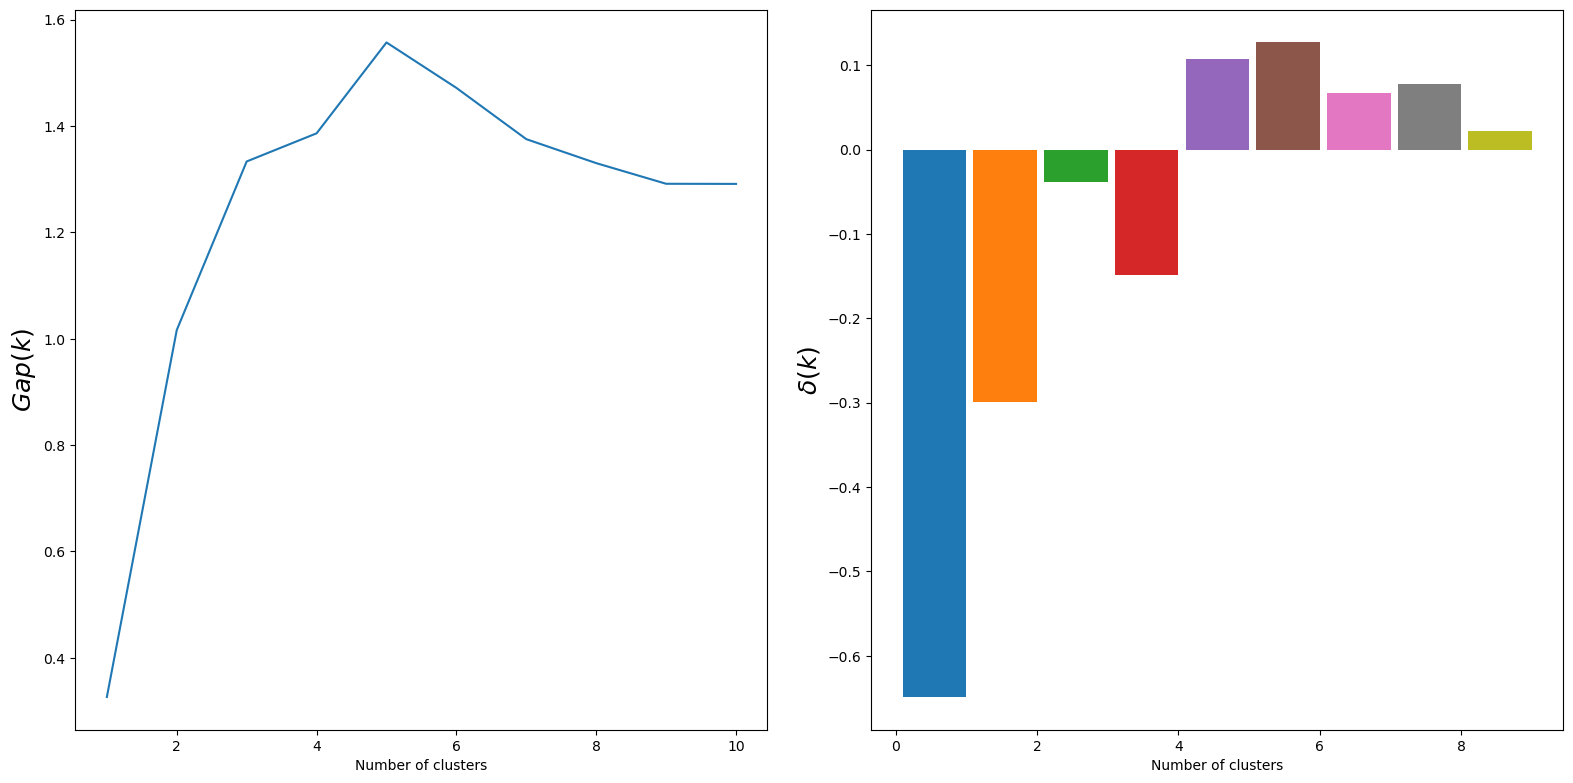

In [14]:
if __name__ == '__main__':
    random_state = 0
    n_samples, n_clusters_max = 1000, 10
    X, _ = make_blobs(n_samples=n_samples, centers=5, random_state=random_state)
    n_clusters_optimal, gaps, deltas = optimal_n_clusters_search(X, n_clusters_max, T=10, random_state=random_state)
    
    print(f"Optimal number of clusters: {n_clusters_optimal}")
    
    # Visualize the Gap and delta values
    n_clusters_range = np.arange(1, n_clusters_max + 1)
    plot_result(n_clusters_range, gaps, deltas)
    plt.show()


#### Application to Image compression

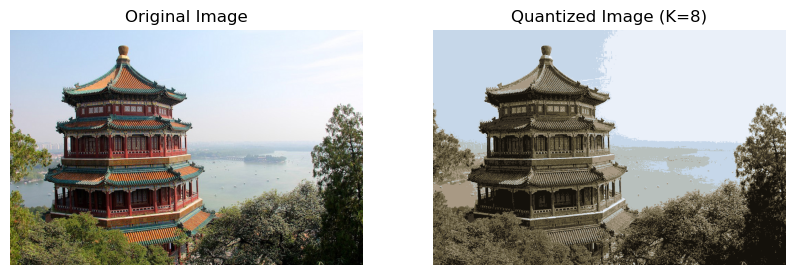

In [51]:
img = plt.imread('china.jpg')

n1, n2, n_colors = img.shape
pixels = img.reshape(-1, 3)
K = 8  
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(pixels)

new_colors = kmeans.cluster_centers_.astype(int)

labels = kmeans.labels_
quantized_img = new_colors[labels]

quantized_img = quantized_img.reshape(n1, n2, 3)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Quantized Image (K={K})")
plt.imshow(quantized_img)
plt.axis('off')

plt.show()